In [ ]:
'''
This script is just for plotting stored sparsity data results. 
Most of its functionality is copied and pasted from elsewhere.
Created by Yoni Browning, August 2018
'''

In [10]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import oBehave.plotting_stuff as obps
import oBehave.helperfunctions as obhf
import oBehave.neural_analysis as obna
import oBehave.behavior_anaylsis as obba


In [11]:
# load the data from file
# Load the manifest
manifest = obhf.load_manifest()
obba.includeNovelSession(manifest);
DF = pd.read_pickle('./popMeanResponseSelectivity.pkl')

In [74]:
# script fo rmaking an emperical cumulative density plot. Should be moved to plotting_stuff
def ecdf(data,plotme = True,ax = None,**kwargs):
    if not 'linestyle' in kwargs:
        kwargs['linestyle'] = '-'
    if not 'marker' in kwargs:
        kwargs['marker'] = '.'
    
    if ax is None:
        ax = plt.gca()
    data = np.array(data)# Just in case
    data = data[np.isfinite(data)]
    cdfx = np.sort(np.unique(data[np.isfinite(data)]))
    yval = np.zeros(cdfx.shape)
    
    for ii,xx in enumerate(cdfx):
        yval[ii] = float(len(data[data<xx]))/float(len(data))
    if plotme:
        ax.plot(cdfx,yval,**kwargs)
    return cdfx,yval

In [70]:
CR = DF.copy()
CR = CR.merge(manifest,left_on='experiment_id',right_on='experiment_id',how='left')

Ks_2sampResult(statistic=0.12036326107333029, pvalue=0.0009884215016472677)

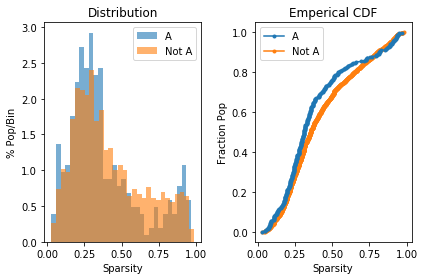

In [122]:
# Parameters for first plot:

colorlist_default = plt.rcParams['axes.prop_cycle'].by_key()['color']
#colorlist = ['#dd1c77','#2ca25f', '#8856a7', colorlist_default[0]]
colorlist = colorlist_default;
key1 = 'SparAve'
key_logical1 = np.isfinite(CR[key1])
cre_logical1 = (CR['cre_line_x']=='Slc17a7-IRES2-Cre')
session_logical1 = (CR['session_type_y'].str.contains('A'))
target_logical1 = (CR['targeted_structure']=='VISp')
# Parameters for second plot:
key2 = 'SparAve'
key_logical2 = np.isfinite(CR[key2])
cre_logical2 = (CR['cre_line_x']=='Slc17a7-IRES2-Cre')
session_logical2 = (CR['session_type_y'] is not 'behavior_session_A')
target_logical2 = (CR['targeted_structure']=='VISp')
# 3
key3 = 'Spar3'
key_logical3 = np.isfinite(CR[key3])
cre_logical3 = (CR['cre_line_x']=='Slc17a7-IRES2-Cre')
session_logical3 = (CR['session_type_y'].str.contains('A'))
target_logical3 = (CR['targeted_structure']=='VISp')
# 4
key4 = 'SparAve'
key_logical4 = np.isfinite(CR[key4])
cre_logical4 = (CR['cre_line_x']=='Slc17a7-IRES2-Cre')
session_logical4 = (CR['session_type_y'].str.contains('A'))
target_logical4 = (CR['targeted_structure']=='VISp')
leg = ['A','Not A']

fig = plt.figure(tight_layout = True)
axes = fig.subplots(1,2)
axes[0].hist(CR[key1][key_logical1&cre_logical1&session_logical1&target_logical1].values,bins =30,normed = True,alpha = .6,color = colorlist[0])
axes[0].hist(CR[key2][key_logical2&cre_logical2&session_logical2&target_logical2].values,bins =30,normed = True,alpha = .6,color = colorlist[1])
#axes[0].hist(CR[key3][key_logical3&cre_logical2&session_logical3&target_logical3].values,bins =30,normed = True,alpha = .6,color = colorlist[2])
#axes[0].hist(CR[key4][key_logical4&cre_logical2&session_logical4&target_logical4].values,bins =30,normed = True,alpha = .6,color = colorlist[3])

axes[0].legend(leg)
axes[0].set_title('Distribution')
axes[0].set_ylabel('% Pop/Bin')
axes[0].set_xlabel('Sparsity')

ecdf(CR[key1][key_logical1&cre_logical1&session_logical1&target_logical1].values,ax = axes[1],color = colorlist[0],zorder = 3)
ecdf(CR[key2][key_logical2&cre_logical2&session_logical2&target_logical2].values,ax = axes[1],color = colorlist[1])
#ecdf(CR[key3][key_logical3&cre_logical3&session_logical3&target_logical3].values,ax = axes[1],color = colorlist[2])
#ecdf(CR[key4][key_logical4&cre_logical4&session_logical4&target_logical4].values,ax = axes[1],color = colorlist[3])

axes[1].legend(leg)
axes[1].set_title('Emperical CDF')
axes[1].set_ylabel('Fraction Pop')
axes[1].set_xlabel('Sparsity')

sp.stats.ks_2samp(CR[key1][key_logical1&cre_logical1&session_logical1&target_logical1].values,CR[key2][key_logical2&cre_logical2&session_logical2&target_logical2].values)

In [ ]:
# Old version
# def ecdf(data,plotme = True,ax = None,lineopts={'linestyle':'-','marker':'.'}):
#     if ax is None:
#         ax = plt.gca()
#     data = np.array(data)# Just in case
#     data = data[np.isfinite(data)]
#     cdfx = np.sort(np.unique(data[np.isfinite(data)]))
#     yval = np.zeros(cdfx.shape)
#     for ii,xx in enumerate(cdfx):
#         yval[ii] = float(len(data[data<xx]))/float(len(data))
#     if plotme:
#         ax.plot(cdfx,yval,**lineopts)
#     return cdfx,yval